In [27]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import glob

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import random

In [28]:
path = 'C:/Users/user/Desktop/16017005/card/open'

In [29]:
import os
os.listdir(path)

['1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '7.jpg',
 'a1.jpg',
 'a2.jpg',
 'a3.jpg',
 'a4.jpg',
 'a5.jpg',
 'a6.jpg',
 'Airline.csv',
 'b1.jpg',
 'b2.jpg',
 'b3.jpg',
 'b4.jpg',
 'b5.jpg',
 'b6.jpg',
 'b7.jpg',
 'catboost_info',
 'chart1.csv',
 'KNOW-CKD변수정리_220119.xlsx',
 'KNOWCKD_분석자료_220119.xlsx',
 'logistic_1.csv',
 'nda.xlsx',
 'newdata.csv',
 'newdata2.csv',
 'nlas2020.csv',
 'nlas2020_revised.csv',
 'sample_submission.csv',
 'sort.csv',
 'test.csv',
 'train.csv']

In [30]:
data = pd.read_csv(path+'/Airline.csv' ,engine='python',encoding='CP949')

In [31]:
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [32]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<AxesSubplot:>

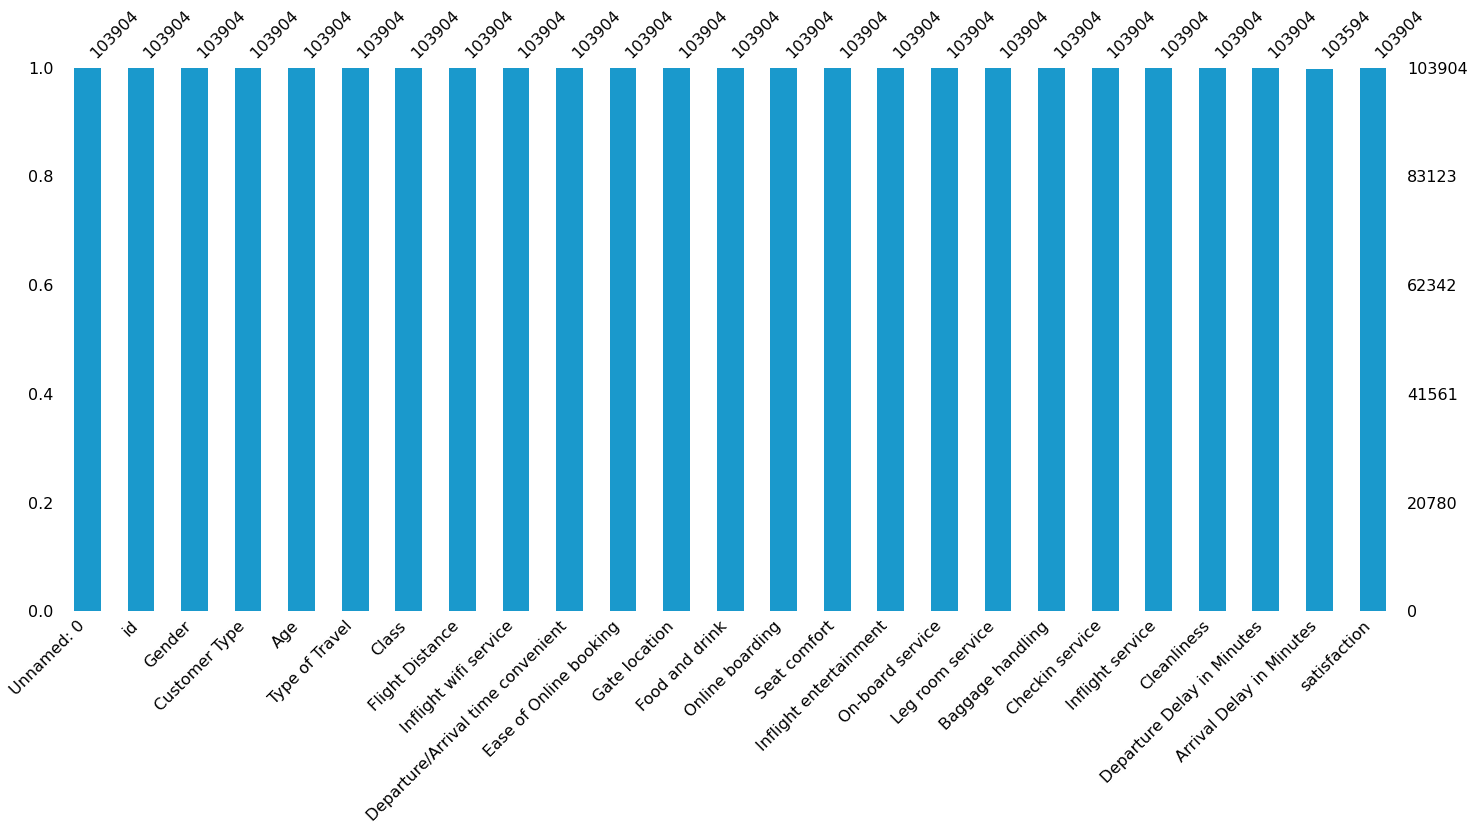

In [33]:
import missingno as msno
msno.bar(df=data.iloc[:, :], color=(0.1, 0.6, 0.8))

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [35]:
from scipy.stats import kendalltau, pearsonr, spearmanr
def pearsonr_co(x,y):
        return pearsonr(x,y)[0]
def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]

In [36]:
co = data.corr(method=pearsonr_co)
co

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.002991,0.004786,0.002794,-0.002490,0.000739,0.001913,0.005073,-0.002162,0.001002,0.000044,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.000045
id,0.002991,1.000000,0.022857,0.095544,-0.021276,-0.002110,0.014163,-0.000606,0.001063,0.055477,0.052903,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.037254
Age,0.004786,0.022857,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.002794,0.095544,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,-0.002490,-0.021276,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.000739,-0.002110,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.001913,0.014163,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,0.005073,-0.000606,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,-0.002162,0.001063,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.001002,0.055477,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949


In [37]:
co2=co.iloc[2:, 2:]

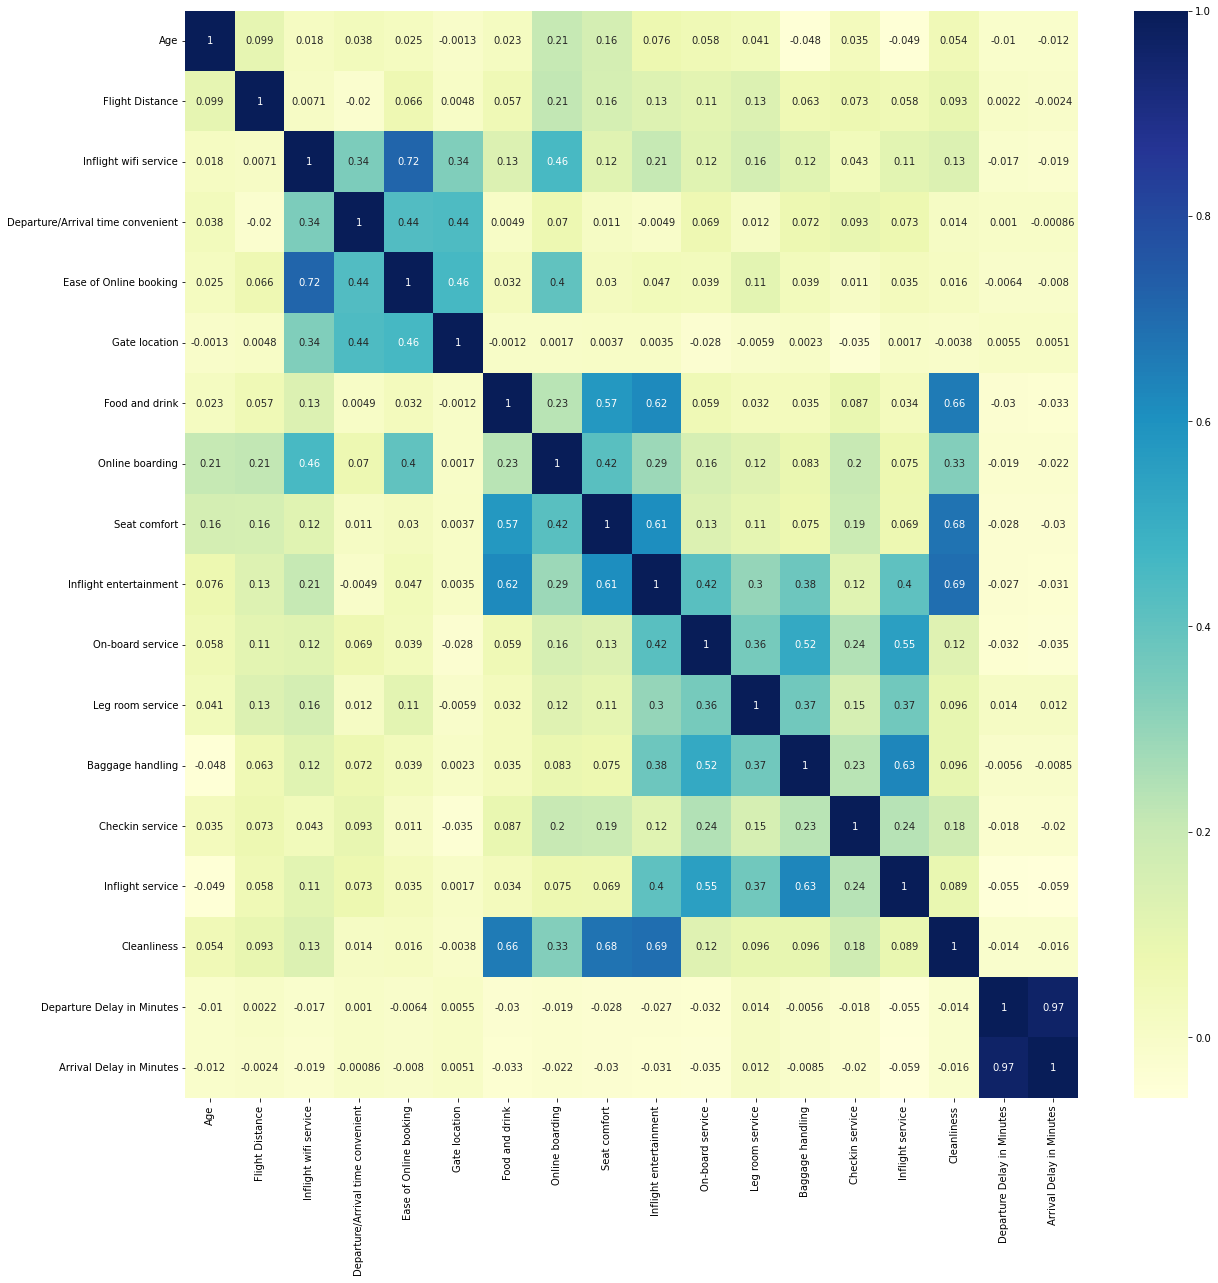

In [38]:
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(co2, cmap="YlGnBu", annot=True)

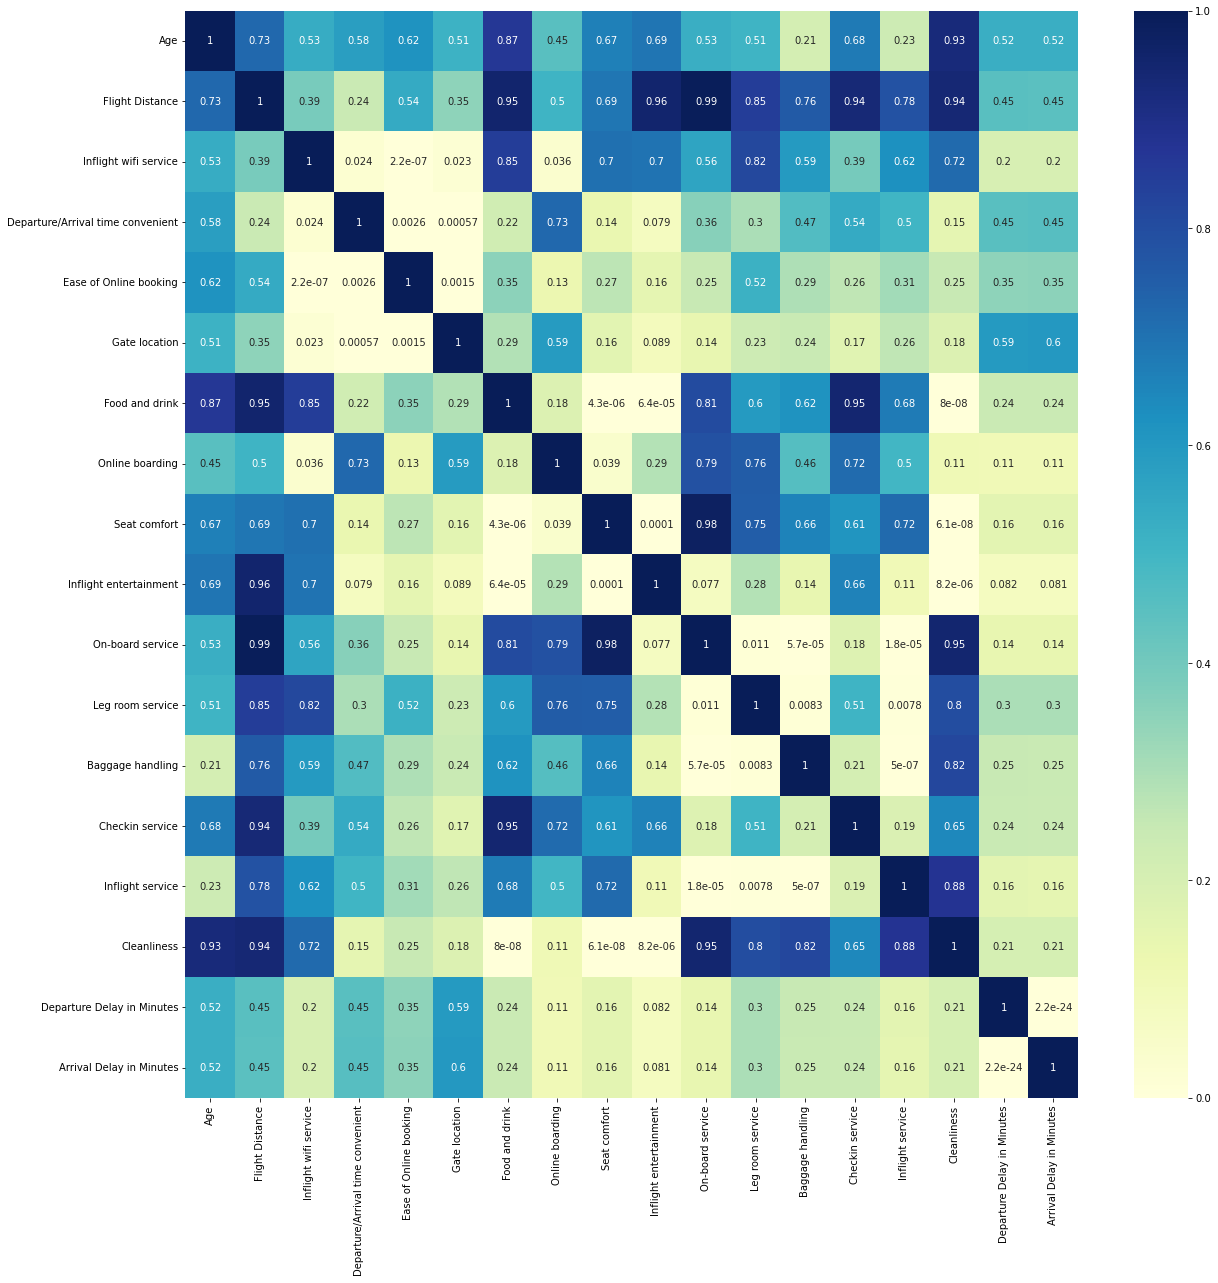

In [39]:
plt.figure(figsize=(20,20))
pv = co2.corr(method=pearsonr_pval)
dataplot = sns.heatmap(pv, cmap="YlGnBu", annot=True)

In [40]:
data.isnull().any()

Unnamed: 0                           False
id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Del

In [41]:
pd.value_counts(data['Unnamed: 0']).sort_index()

0         1
1         1
2         1
3         1
4         1
         ..
103899    1
103900    1
103901    1
103902    1
103903    1
Name: Unnamed: 0, Length: 103904, dtype: int64

In [42]:
pd.value_counts(data['id']).sort_index()

1         1
2         1
3         1
4         1
5         1
         ..
129874    1
129875    1
129878    1
129879    1
129880    1
Name: id, Length: 103904, dtype: int64

In [43]:
pd.value_counts(data['Gender']).sort_index()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [44]:
data2 = data['Gender'].replace(['Female', 'Male'],[1,2])

In [45]:
data2

0         2
1         2
2         1
3         1
4         2
         ..
103899    1
103900    2
103901    2
103902    1
103903    2
Name: Gender, Length: 103904, dtype: int64

In [46]:
data["Female"] = data["Gender"].apply(lambda x : x.count("Female"))
data["Male"] = data["Gender"].apply(lambda x : x.count("Male"))

In [47]:
data['Female']

0         0
1         0
2         1
3         1
4         0
         ..
103899    1
103900    0
103901    0
103902    1
103903    0
Name: Female, Length: 103904, dtype: int64

In [48]:
data['Male']

0         1
1         1
2         0
3         0
4         1
         ..
103899    0
103900    1
103901    1
103902    0
103903    1
Name: Male, Length: 103904, dtype: int64

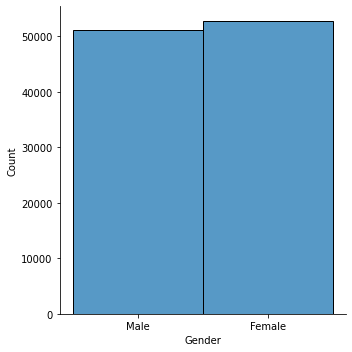

In [49]:
sns.displot(data['Gender'])

In [50]:
pd.value_counts(data['Age']).sort_index()

7     562
8     640
9     692
10    683
11    678
     ... 
77     87
78     33
79     42
80     78
85     17
Name: Age, Length: 75, dtype: int64

<AxesSubplot:ylabel='Age'>

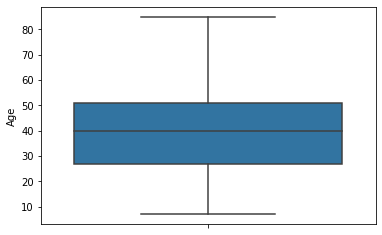

In [51]:
#rcParams['figure.figsize'] = 4,6
fig, ax = plt.subplots()
sns.boxplot(y= data['Age'])

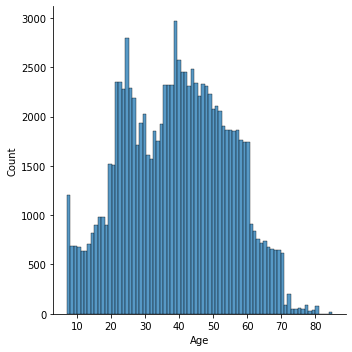

In [52]:
sns.displot(data['Age'])

In [53]:
pd.value_counts(data['Customer Type']).sort_index()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

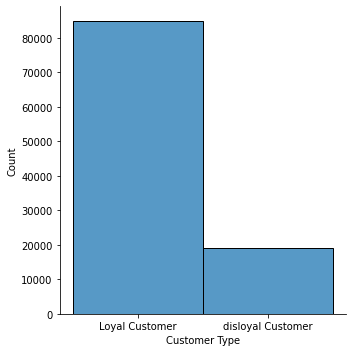

In [54]:
sns.displot(data['Customer Type'])

In [55]:
pd.value_counts(data['Type of Travel']).sort_index()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

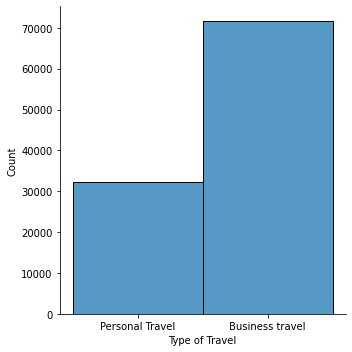

In [56]:
sns.displot(data['Type of Travel'])

In [57]:
pd.value_counts(data['Class']).sort_index()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

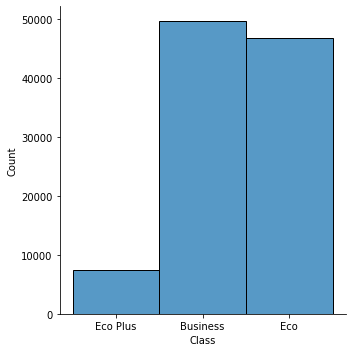

In [58]:
sns.displot(data['Class'])

In [59]:
pd.value_counts(data['Flight Distance']).sort_index()

31        8
56        8
67      128
73       59
74       30
       ... 
4243     18
4502     10
4817      5
4963     13
4983     12
Name: Flight Distance, Length: 3802, dtype: int64

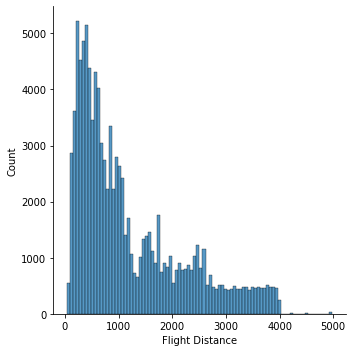

In [60]:
sns.displot(data['Flight Distance'])

<AxesSubplot:ylabel='Flight Distance'>

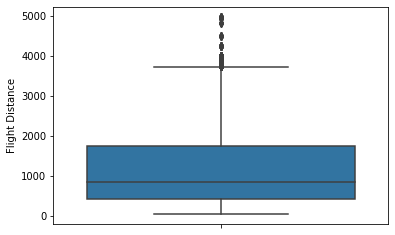

In [61]:
fig, ax = plt.subplots()
sns.boxplot(y=data['Flight Distance'])

In [62]:
data['Flight Distance'].describe()

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

In [63]:

def draw_comparative_bar_plot(satisfied_column, dissatisfied_column, **kwargs):
    pd.concat(
        [
            satisfied_column.value_counts(), 
            dissatisfied_column.value_counts()
        ],
        axis=1, 
        ignore_index=True
    ) \
    .rename({0: 'satisfied', 1: 'dissatisfied'}, axis=1) \
    .plot(kind='bar', **kwargs)

In [64]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

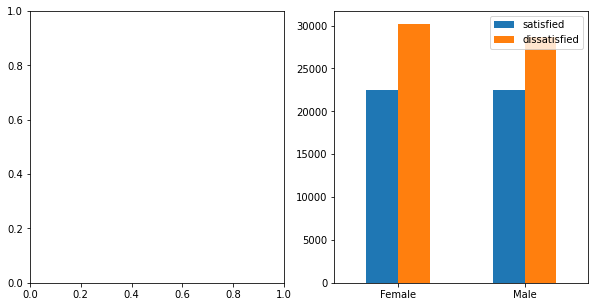

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.ravel()

draw_comparative_bar_plot(satisfied['Gender'], dissatisfied['Gender'], ax=ax[1], figsize=(10, 5))
plt.xticks(rotation =0)


(array([0, 1]),
 [Text(0, 0, 'Loyal Customer'), Text(1, 0, 'disloyal Customer')])

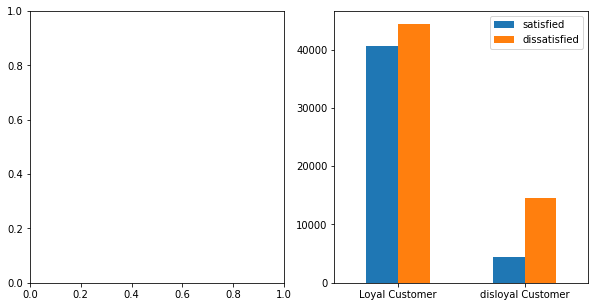

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.ravel()
draw_comparative_bar_plot(satisfied['Customer Type'], dissatisfied['Customer Type'],  ax=ax[1], figsize=(10, 5))
plt.xticks(rotation =0)

(array([0, 1]), [Text(0, 0, 'Business travel'), Text(1, 0, 'Personal Travel')])

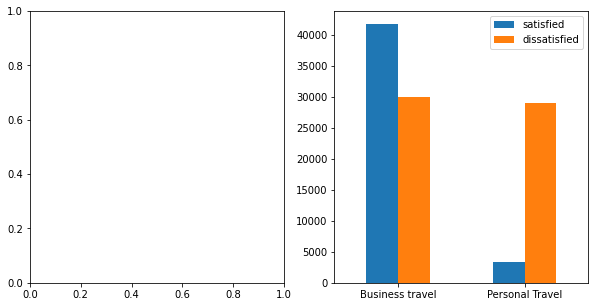

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.ravel()
draw_comparative_bar_plot(satisfied['Type of Travel'], dissatisfied['Type of Travel'],  ax=ax[1], figsize=(10, 5))
plt.xticks(rotation =0)

(array([0, 1, 2]),
 [Text(0, 0, 'Business'), Text(1, 0, 'Eco'), Text(2, 0, 'Eco Plus')])

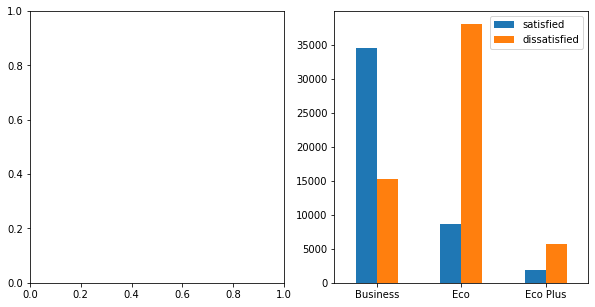

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.ravel()
draw_comparative_bar_plot(satisfied['Class'], dissatisfied['Class'], ax=ax[1], figsize=(10, 5))
plt.xticks(rotation =0)

In [69]:
data.loc[data['Flight Distance']< 414, 'FD_1'] = 1
data.loc[data['Flight Distance']== 414, 'FD_1'] = 1
data.loc[data['Flight Distance']> 414, 'FD_1'] = 2
data.loc[data['Flight Distance']> 843 , 'FD_1'] = 3
data.loc[data['Flight Distance']> 1743, 'FD_1'] = 4

In [70]:
data['FD_1']

0         2.0
1         1.0
2         3.0
3         2.0
4         1.0
         ... 
103899    1.0
103900    4.0
103901    4.0
103902    3.0
103903    3.0
Name: FD_1, Length: 103904, dtype: float64

KeyError: 'FD_1'

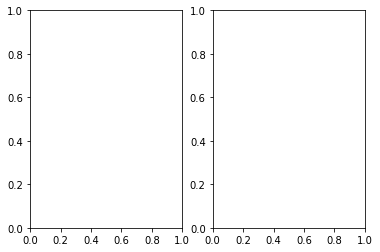

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.ravel()
draw_comparative_bar_plot(satisfied['FD_1'], dissatisfied['FD_1'], ax=ax[1], figsize=(10, 5))
plt.xticks(rotation =0)

In [ ]:
pd.value_counts(data['Inflight wifi service']).sort_index()

In [ ]:
pd.value_counts(data['Departure/Arrival time convenient']).sort_index()

In [ ]:
pd.value_counts(data['Ease of Online booking']).sort_index()

In [ ]:
pd.value_counts(data['Gate location']).sort_index()

In [ ]:
pd.value_counts(data['Food and drink']).sort_index()

In [ ]:
pd.value_counts(data['Online boarding']).sort_index()

In [ ]:
pd.value_counts(data['Seat comfort']).sort_index()

In [ ]:
pd.value_counts(data['Inflight entertainment']).sort_index()

In [ ]:
pd.value_counts(data['On-board service']).sort_index()

In [ ]:
pd.value_counts(data['Leg room service']).sort_index()

In [ ]:
pd.value_counts(data['Baggage handling']).sort_index()

In [ ]:
pd.value_counts(data['Checkin service']).sort_index()

In [ ]:
pd.value_counts(data['Inflight service']).sort_index()

In [ ]:
pd.value_counts(data['Cleanliness']).sort_index()

In [ ]:
data2 = data.iloc[:, 8:22]
data2

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=5)
ax = ax.ravel()
draw_comparative_bar_plot(satisfied['Inflight wifi service'], dissatisfied['Inflight wifi service'], ax=ax[0], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Departure/Arrival time convenient'], dissatisfied['Departure/Arrival time convenient'], ax=ax[1], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Ease of Online booking'], dissatisfied['Ease of Online booking'], ax=ax[2], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Gate location'], dissatisfied['Gate location'], ax=ax[3], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Food and drink'], dissatisfied['Food and drink'], ax=ax[4], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Online boarding'], dissatisfied['Online boarding'], ax=ax[5], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Seat comfort'], dissatisfied['Seat comfort'], ax=ax[6], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Inflight entertainment'], dissatisfied['Inflight entertainment'], ax=ax[7], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['On-board service'], dissatisfied['On-board service'], ax=ax[8], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Leg room service'], dissatisfied['Leg room service'], ax=ax[9], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Baggage handling'], dissatisfied['Baggage handling'], ax=ax[10], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Checkin service'], dissatisfied['Checkin service'], ax=ax[11], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Inflight service'], dissatisfied['Inflight service'], ax=ax[12], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Cleanliness'], dissatisfied['Cleanliness'], ax=ax[13], figsize=(30, 20))
plt.xticks(rotation =0)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.ravel()
draw_comparative_bar_plot(satisfied['Departure/Arrival time convenient'], dissatisfied['Departure/Arrival time convenient'], ax=ax[1], figsize=(10, 8))
plt.title('Departure/Arrival time convenient')
plt.xticks(rotation =0)

In [ ]:
# 각 문항에 대한 응답 빈도 데이터
frequencies = {}       
for i in ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']:
    frequencies[i] = data2[i].value_counts()

In [ ]:
# 행/열 전환
df_freq = pd.DataFrame(frequencies).T
# 빈도를 비율로 변환 (문항별)
df_freq = df_freq.div(df_freq.sum(axis=1), axis=0)*100
# columns 순서 정렬 (응답 1,2,3,4,5 순으로)
df_freq = df_freq.reindex(sorted(df_freq.columns), axis=1)
df_freq

In [ ]:
df_melt = pd.melt(frame=data2,
                  id_vars=None,
                  var_name="문항",
                  value_vars=['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'],
                  value_name="응답")

In [ ]:
df_freq.plot(kind="barh", stacked=True, colormap='RdBu')

In [ ]:
pd.value_counts(data['Departure Delay in Minutes']).sort_index()

In [ ]:
plt.hist(data['Departure Delay in Minutes'])
plt.show()

In [ ]:
d_delay = data.loc[:,['Departure Delay in Minutes']]
print(d_delay.quantile(.25))
print(d_delay.quantile(.5))
print(d_delay.quantile(.75))

In [ ]:
d_delay2 = d_delay.replace(0, np.NaN)
d_delay3 = d_delay2.loc[:,['Departure Delay in Minutes']]
print(d_delay3.quantile(.25))
print(d_delay3.quantile(.5))
print(d_delay3.quantile(.75))

In [ ]:
data.loc[data['Departure Delay in Minutes'] == 0, 'd_delay4'] = 0
data.loc[data['Departure Delay in Minutes'] > 0, 'd_delay4'] = 1
data.loc[data['Departure Delay in Minutes'] > 40, 'd_delay4'] = 2
data.loc[data['Departure Delay in Minutes'] > 80, 'd_delay4'] = 3
data.loc[data['Departure Delay in Minutes'] > 120, 'd_delaby4'] = 4

In [ ]:
data['d_delay4']

In [ ]:
plt.hist(data['d_delay4'])

In [ ]:
plt.hist(d_delay3)
plt.show()

In [ ]:
pd.value_counts(data['Arrival Delay in Minutes']).sort_index()

In [ ]:
a_delay = data.loc[:,['Arrival Delay in Minutes']]
print(a_delay.quantile(.25))
print(a_delay.quantile(.5))
print(a_delay.quantile(.75))

In [ ]:
a_delay2 = a_delay.replace(0, np.NaN)
a_delay3 = a_delay2.loc[:,['Arrival Delay in Minutes']]
print(a_delay3.quantile(.25))
print(a_delay3.quantile(.5))
print(a_delay3.quantile(.75))

In [ ]:
fig, ax = plt.subplots()
plt.boxplot(d_delay)
plt.title('Departure delay')

In [ ]:
pd.value_counts(data['satisfaction']).sort_index()

In [ ]:
data2 = data.iloc[:, 8:22]
data2

In [ ]:
plt.figure(figsize=(12, 9))
plt.boxplot(data2)
plt.show

In [ ]:
data['f_delay'] = data['Departure Delay in Minutes'] + data['Arrival Delay in Minutes']

In [ ]:
data.loc[data['f_delay'] == 0, 'f_delay1'] = 0
data.loc[data['f_delay'] > 0, 'f_delay1'] = 1
data.loc[data['f_delay'] > 60, 'f_delay1'] = 2

In [ ]:
data['f_delay1']

In [ ]:
pd.value_counts(data['f_delay1']).sort_index()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.ravel()
draw_comparative_bar_plot(satisfied['f_delay1'], dissatisfied['f_delay1'], ax=ax[1], figsize=(10, 5))
plt.xticks(rotation =0)

In [72]:
import pingouin
print(pingouin.cronbach_alpha(data=data2))

AssertionError: data must be a dataframe.

In [60]:
!pip install pycaret

In [61]:
from pycaret.classification import *

In [62]:
clf = setup(data = data, target = 'satisfaction', train_size=0.8, session_id = 123)

# categorical - 성별, 교육수준, 배우자유무

,Description,Value
0,session_id,123
1,Target,satisfaction
2,Target Type,Binary
3,Label Encoded,"neutral or dissatisfied: 0, satisfied: 1"
4,Original Data,"(103904, 25)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [65]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9656,0.9957,0.9476,0.9724,0.9598,0.9298,0.9301,28.8100
lightgbm,Light Gradient Boosting Machine,0.9649,0.9952,0.9423,0.9759,0.9588,0.9282,0.9287,1.1220
xgboost,Extreme Gradient Boosting,0.9648,0.9954,0.9463,0.9717,0.9588,0.9280,0.9283,16.7050
et,Extra Trees Classifier,0.9615,0.9935,0.9388,0.9714,0.9548,0.9213,0.9217,9.6550
rf,Random Forest Classifier,0.9614,0.9938,0.9374,0.9726,0.9547,0.9211,0.9216,7.5980
dt,Decision Tree Classifier,0.9481,0.9472,0.9411,0.9392,0.9402,0.8943,0.8943,0.7710
gbc,Gradient Boosting Classifier,0.9469,0.9888,0.9241,0.9521,0.9379,0.8916,0.8919,17.9130
ridge,Ridge Classifier,0.9305,0.0000,0.9072,0.9308,0.9188,0.8581,0.8583,0.1570
lda,Linear Discriminant Analysis,0.9305,0.9757,0.9073,0.9308,0.9189,0.8582,0.8584,1.8760
ada,Ada Boost Classifier,0.9281,0.9782,0.9106,0.9225,0.9165,0.8533,0.8534,3.9410


In [66]:
from pycaret.datasets import get_data
X_test = get_config('X_test')
X_train = get_config('X_train')
Y_test = get_config('y_test')
Y_train = get_config('y_train')

test_x = get_config('X_test')
train_x = get_config('X_train')
test_y = get_config('y_test')
train_y = get_config('y_train')

x_test = get_config('X_test')
x_train = get_config('X_train')
y_test = get_config('y_test')
y_train = get_config('y_train')

In [67]:
total_models = []
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [69]:
import time
start = time.time()
model_cat = create_model('catboost')
end= time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9640,0.9954,0.9437,0.9725,0.9579,0.9265,0.9268
1,0.9679,0.9963,0.9509,0.9744,0.9625,0.9344,0.9346
2,0.9631,0.9954,0.9470,0.9671,0.9570,0.9246,0.9248
3,0.9658,0.9962,0.9503,0.9703,0.9602,0.9303,0.9304
4,0.9652,0.9954,0.9464,0.9726,0.9594,0.9290,0.9293
5,0.9656,0.9956,0.9462,0.9737,0.9598,0.9297,0.9300
6,0.9628,0.9952,0.9448,0.9687,0.9566,0.9241,0.9243
7,0.9670,0.9956,0.9464,0.9768,0.9614,0.9326,0.9330
8,0.9685,0.9960,0.9548,0.9720,0.9633,0.9357,0.9358
9,0.9663,0.9957,0.9456,0.9759,0.9605,0.9312,0.9315


321.02730321884155


In [70]:
tuned_cat = tune_model(model_cat, n_iter = 100)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:43:49
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 22.0min


KeyboardInterrupt: 

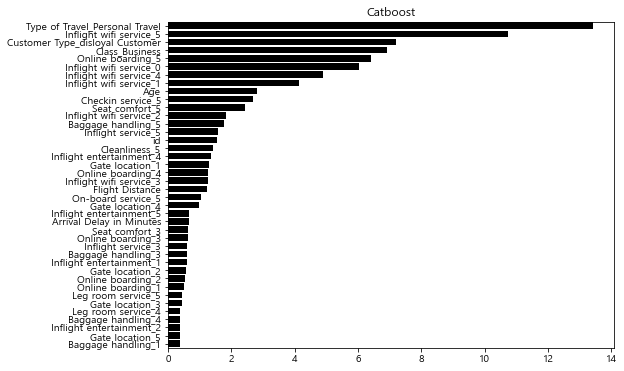

In [71]:
ft_importance_values = model_cat.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:40]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top20, y=ft_top20.index, color='black')
plt.title('Catboost')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
evaluate_model(model_cat)

<Figure size 576x396 with 0 Axes>